In [3]:
import pandas as pd 
df = pd.read_csv('/content/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


##1. Vẽ biểu đồ cột cho neighborhood group

In [4]:
import matplotlib.pyplot as plt
df_nei_gr = df["neighbourhood_group"].value_counts()
df_nei_gr

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [5]:
X = df_nei_gr.index.to_numpy()
y = df_nei_gr.to_numpy()
print(X)
print(y)

['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
[21661 20104  5666  1091   373]


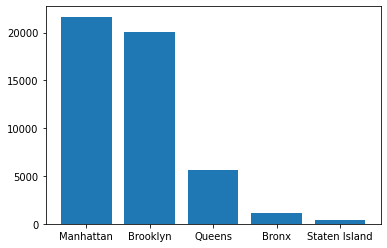

In [6]:
plt.bar(X, y)
plt.show()

##2. tạo histogram cho neighbourhood

In [7]:
df_nei = df["neighbourhood"].value_counts()
df_nei

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

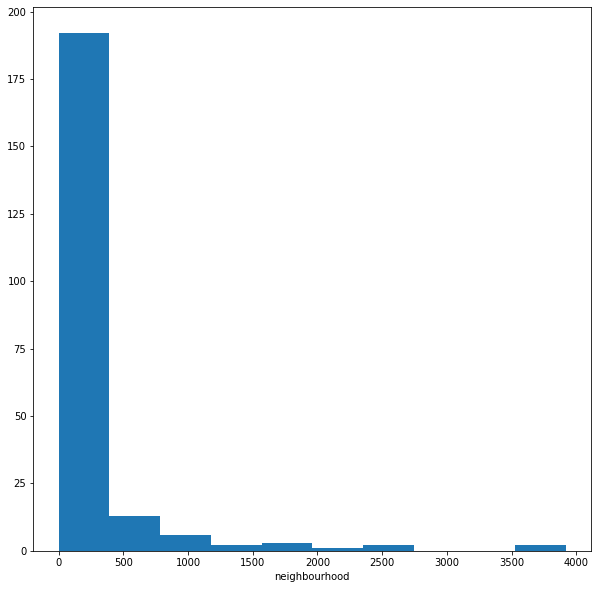

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(df_nei.to_numpy())
plt.xlabel("neighbourhood")
plt.show()

##3. 3. Biểu diễn mối liên hệ giữa neighbourgroup và Availability của các phòng

In [50]:
nei_gr_arr = df_encoder["neighbourhood_group"].head(200).to_numpy()
av_arr = df_encoder["availability_365"].head(200).to_numpy()
x = df_encoder["id"].head(200).to_numpy()

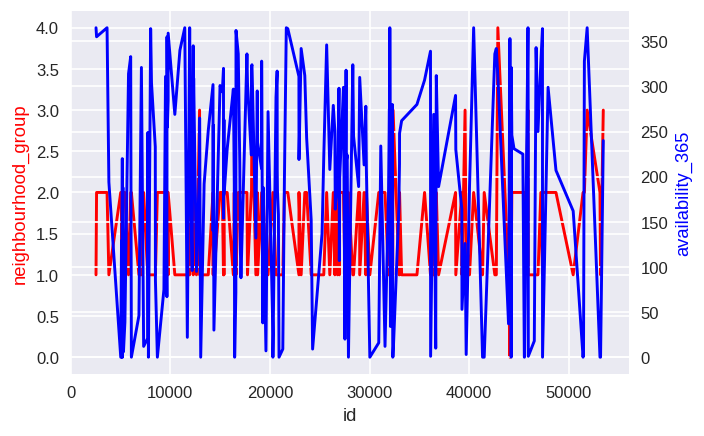

In [53]:
fig, ax1 = plt.subplots(1,1,figsize=(6, 4), dpi=120)
ax1.plot(x, nei_gr_arr, color='red')
ax2=ax1.twinx()
ax2.plot(x, av_arr, color='blue')

ax1.set_xlabel('id')
ax1.set_ylabel('neighbourhood_group', color='red')
ax2.set_ylabel('availability_365', color='blue')

plt.show()

##4. Vẽ bản đồ (scatter plot) của neighborhood dựa theo tọa độ lat lon

In [9]:
df_lat = df["latitude"]
df_lat

0        40.64749
1        40.75362
2        40.80902
3        40.68514
4        40.79851
           ...   
48890    40.67853
48891    40.70184
48892    40.81475
48893    40.75751
48894    40.76404
Name: latitude, Length: 48895, dtype: float64

In [10]:
df_lon = df["longitude"]
df_lon

0       -73.97237
1       -73.98377
2       -73.94190
3       -73.95976
4       -73.94399
           ...   
48890   -73.94995
48891   -73.93317
48892   -73.94867
48893   -73.99112
48894   -73.98933
Name: longitude, Length: 48895, dtype: float64

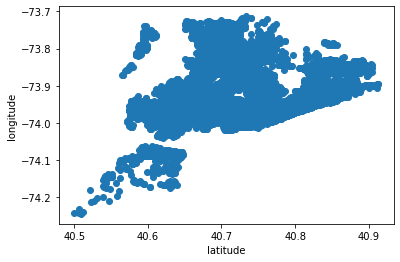

In [11]:
plt.scatter(df_lat.to_numpy(), df_lon.to_numpy())
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

##5. Sử dụng heatmap để biểu diễn mối quan hệ (correlation) giữa tất cả các thuộc tính trong dữ liệu

In [12]:
num_df= df.select_dtypes(['float', 'int']).drop(['reviews_per_month'], axis=1)
obj_df = df.select_dtypes(['object']).drop(['last_review'], axis=1)

obj_arr=obj_df.columns.to_numpy()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
one = preprocessing.OneHotEncoder()
  
for i in obj_arr:
   
    obj_df[i] = le.fit_transform(obj_df[i])
    
print(obj_df)

        name  host_name  neighbourhood_group  neighbourhood  room_type
0      12328       4989                    1            108          1
1      37455       4785                    2            127          0
2      43543       2909                    2             94          1
3      14783       6203                    1             41          0
4      18693       5923                    2             61          0
...      ...        ...                  ...            ...        ...
48890  11647       9051                    1             13          1
48891   3520       6776                    1             28          1
48892  42464       4263                    2             94          0
48893   2572      10190                    2             95          2
48894  44538       1968                    2             95          1

[48895 rows x 5 columns]


In [13]:
df_encoder = pd.concat((obj_df, num_df), axis=1)
df_encoder

,name,host_name,neighbourhood_group,neighbourhood,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,12328,4989,1,108,1,2539,2787,40.64749,-73.97237,149,1,9,6,365
1,37455,4785,2,127,0,2595,2845,40.75362,-73.98377,225,1,45,2,355
2,43543,2909,2,94,1,3647,4632,40.80902,-73.94190,150,3,0,1,365
3,14783,6203,1,41,0,3831,4869,40.68514,-73.95976,89,1,270,1,194
4,18693,5923,2,61,0,5022,7192,40.79851,-73.94399,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,11647,9051,1,13,1,36484665,8232441,40.67853,-73.94995,70,2,0,2,9
48891,3520,6776,1,28,1,36485057,6570630,40.70184,-73.93317,40,4,0,2,36
48892,42464,4263,2,94,0,36485431,23492952,40.81475,-73.94867,115,10,0,1,27
48893,2572,10190,2,95,2,36485609,30985759,40.75751,-73.99112,55,1,0,6,2


In [14]:
def normailize(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype != object:
            min = df[key].min()
            max = df[key].max()
            df[key] = (df[key] - min)/(max-min)
            df[key] = df[key].round(decimals=4)
    return df

In [27]:
df_norm = normailize(df_encoder.head(14))
data = df_norm.to_numpy()
data.shape

(14, 14)

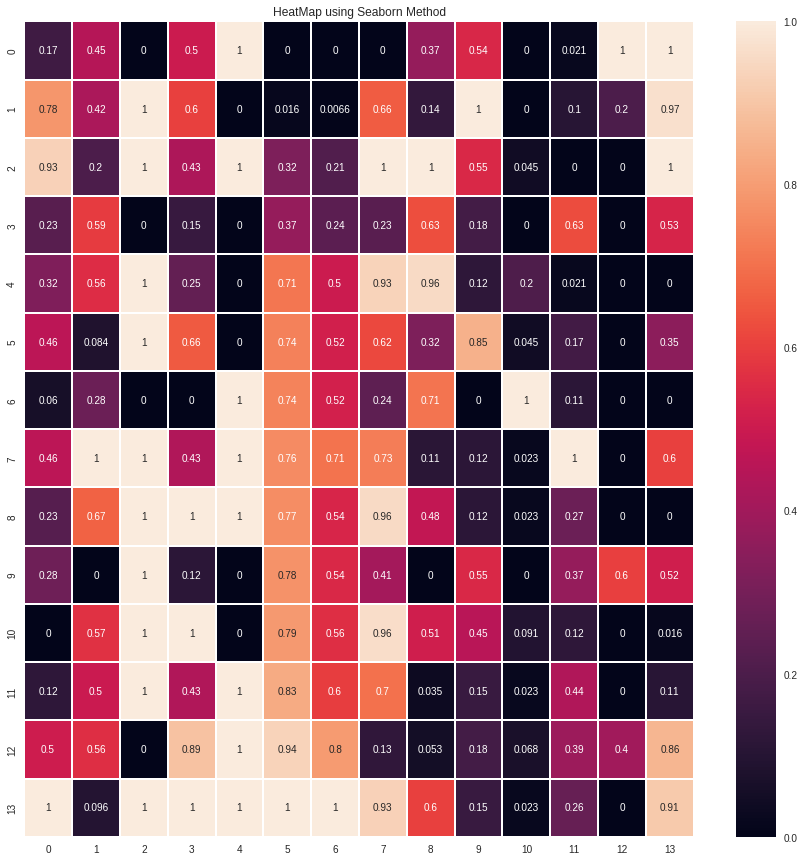

In [28]:
# 1. Import Modules
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
plt.figure(figsize=(15,15))
heat_map = sns.heatmap( data, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

##3. Biểu diễn mối liên hệ giữa neighbourgroup và Availability của các phòng

In [54]:
nei_gr_arr = df_encoder["neighbourhood_group"].head(200).to_numpy()
av_arr = df_encoder["availability_365"].head(200).to_numpy()
x = df_encoder["id"].head(200).to_numpy()

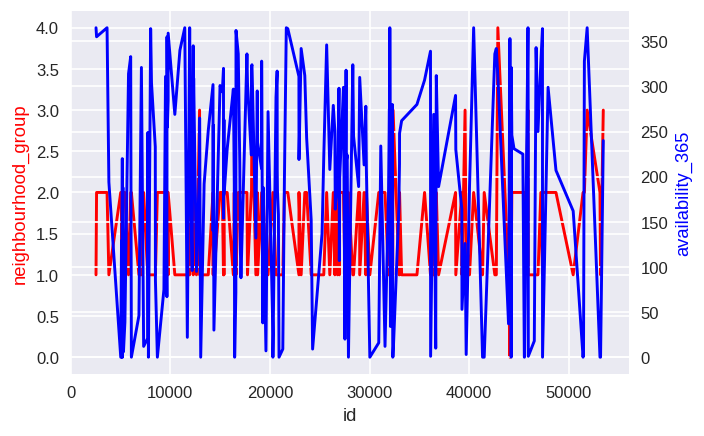

In [55]:
fig, ax1 = plt.subplots(1,1,figsize=(6, 4), dpi=120)
ax1.plot(x, nei_gr_arr, color='red')
ax2=ax1.twinx()
ax2.plot(x, av_arr, color='blue')

ax1.set_xlabel('id')
ax1.set_ylabel('neighbourhood_group', color='red')
ax2.set_ylabel('availability_365', color='blue')

plt.show()